# Module 4 - Machine Learning - Employee Turnover Project

In [7]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt 

In [8]:
# Section 1
# Data Exploration / EDA

In [9]:
# Dataset has total 10 columns,
# 0 to 7 are Numerical columns
# 8 and 9 are Categorical columns
data = pd.DataFrame(pd.read_excel("1688640705_hr_comma_sep.xlsx")) 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [10]:
# Left class column, which is the Label column is Binary and Imbalanced
print("Value Counts for Left column")
print(data['left'].value_counts())


Value Counts for Left column
0    11428
1     3571
Name: left, dtype: int64


In [11]:
# Checking for missing values
# No missing values in any of the columns, so imputation is not required
print("Checking for missing values")
data.isna().sum()

Checking for missing values


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [12]:
# Checking for error in categorical columns - sales and salary
# Sales has 10 unique values
# Salary has 3 unique values
# Categorical columns have no spelling mistakes or any other error
print(data['sales'].unique())
print(data['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [13]:
# Section 2
# Factors contributed most to employee turnover by EDA

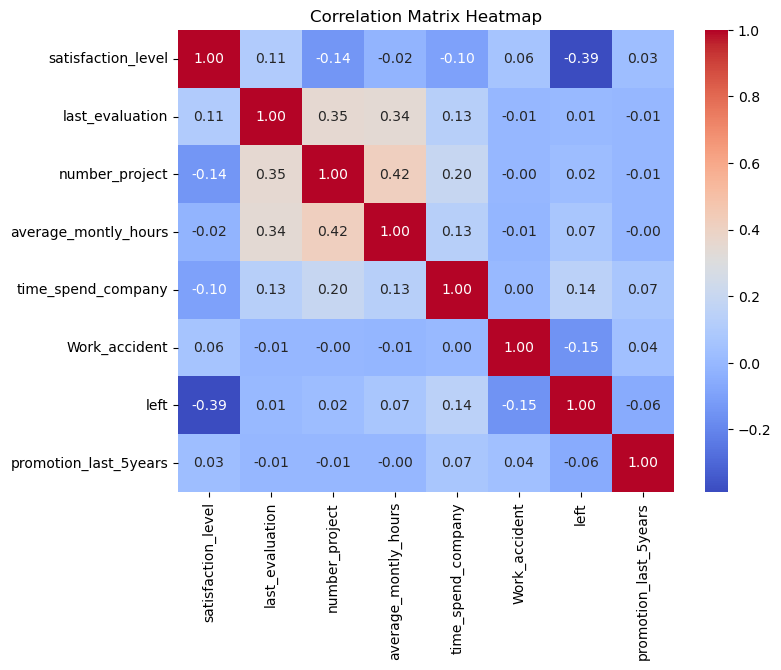

In [14]:
# Section 2.1
# HeatMap of correlation Matrix of all numerical feature column
corrDataset = data.iloc[:,[0,1,2,3,4,5,6,7]]

# Calculate the correlation matrix
correlation_matrix = corrDataset.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: xlabel='satisfaction_level', ylabel='Density'>

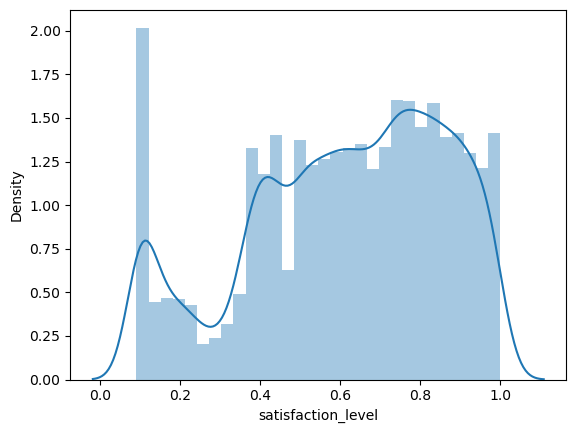

In [15]:
# Section 2.2
# Distribution Plot
# Distribution plot of employee satisfaction
sns.distplot(data['satisfaction_level'])

<Axes: xlabel='last_evaluation', ylabel='Density'>

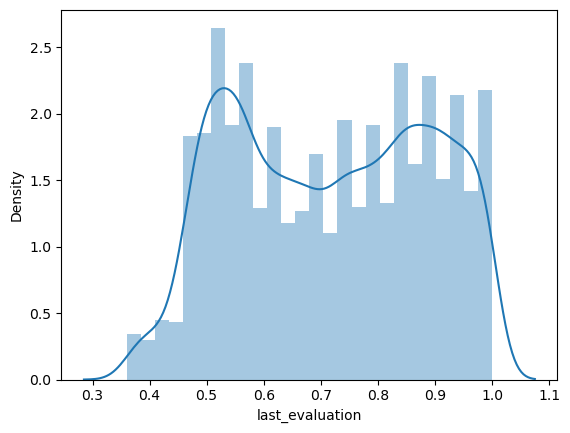

In [16]:
# Distribution plot of employee evaluation
sns.distplot(data['last_evaluation'])

<Axes: xlabel='average_montly_hours', ylabel='Density'>

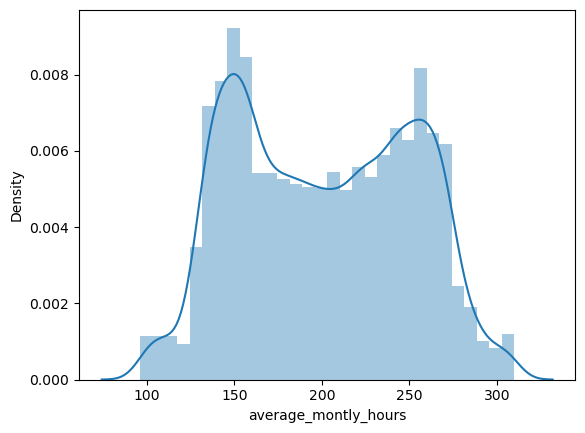

In [17]:
# Distribution plot of average monthly hours
sns.distplot(data['average_montly_hours'])

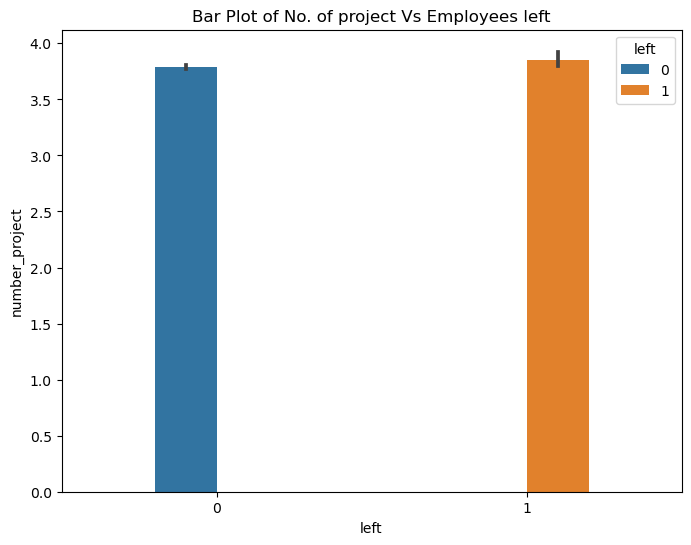

In [18]:
# Section 2.3
# Bar Plot of Employee Project Count Vs Employee who left/stayed in organization
plt.figure(figsize=(8, 6))
sns.barplot( y=data['number_project'],x=data['left'], data=data,hue='left',width=0.4)
plt.title('Bar Plot of No. of project Vs Employees left')
plt.show()

# Inferences for Section 2.3
From the above bar graph we can conclude that almost equal number of projects have been executed by employees
who left the organization and by employees who stayed in the organization

In [20]:
# Section 3
# Clustering of employees based on Satisfaction and Evaluation against Employees 
# who left/stayed in the organization

In [21]:
# Section 3.1 and 3.2
# KMeans clustering of employees
# Considering features Satisfaction level, Evaluation level and Employees Left
features = data.iloc[:,[0,1,6]].values

# Clustering Model Building
# Value of K is set to 3 from the problem statement

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(features)

KMeans(n_clusters=3)

In [22]:
label = model.predict(features)

In [23]:
# Section 3.3
# Performing data alaysis on employee clusters
# Plotting bar plots for to visualize employee clusters
clusterDataset = data.iloc[:,[0,1,6]]
clusterDataset['category']=label

left = clusterDataset.groupby("category")

sat_level = left['satisfaction_level'].agg([np.sum, np.mean])
print("Satisfaction Level")
print(sat_level)
print("Last Evaluation")
last_eval = left['last_evaluation'].agg([np.sum, np.mean])
print(last_eval)

Satisfaction Level
              sum      mean
category                   
0         2156.86  0.458029
1         1571.59  0.440098
2         5463.44  0.813133
Last Evaluation
              sum      mean
category                   
0         3205.97  0.680818
1         2564.38  0.718113
2         4970.46  0.739762


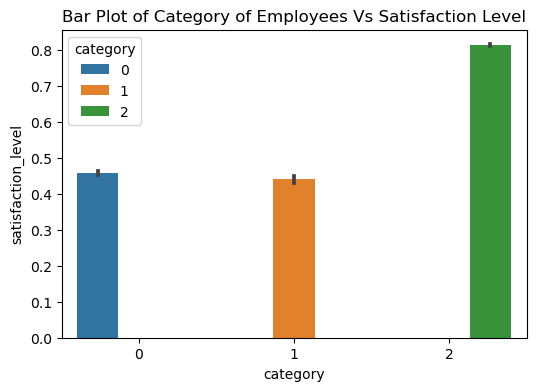

In [24]:
# Bar Plot of Category of Employees Vs Satisfaction Level
plt.figure(figsize=(6, 4))
sns.barplot( y=clusterDataset['satisfaction_level'],x=clusterDataset['category'],hue=clusterDataset['category'])
plt.title('Bar Plot of Category of Employees Vs Satisfaction Level')
plt.show()

## Inference on employee cluster based on satisfaction level
Employees of group 2 had much higher satisfaction level as compared to group 0 and group 1

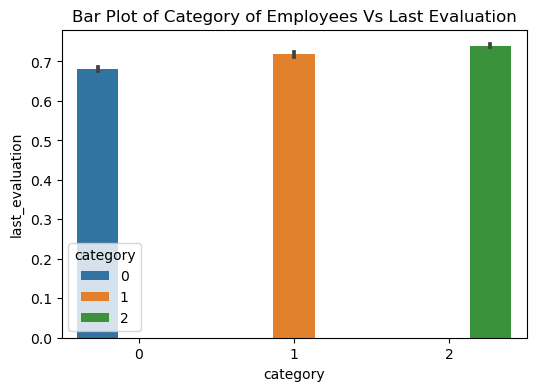

In [26]:
# Bar Plot of Category of Employees Vs Last Evaluation
plt.figure(figsize=(6, 4))
sns.barplot( y=clusterDataset['last_evaluation'],x=clusterDataset['category'],hue=clusterDataset['category'],
            dodge=True, width=0.8)
plt.title('Bar Plot of Category of Employees Vs Last Evaluation')
plt.show()

# Inference on employee cluster based on last evaluation
Employees of all groups group 0, group 1 and group 2 had last similar evaluations

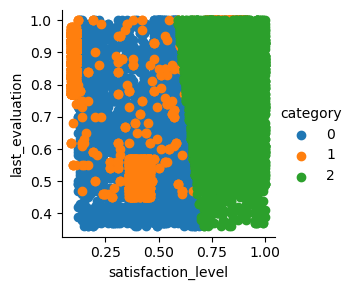

In [27]:
sns.FacetGrid(clusterDataset, hue='category').map(plt.scatter, 'satisfaction_level', 'last_evaluation').add_legend()

In [28]:
# Section 4
# Handling the left class imbalance using SMOTE technique
# Applying stratified split of the dataset 
# Upscanling the train dataset using the SMOTE technique

In [29]:
# Section 4.1
# Data Preprocessing, converting categorical columns to numeric columns
# Initializing the feature and label datasets

finalDataset = pd.concat( [ data.iloc[:,0:10], clusterDataset.iloc[:,-1]]  , axis = 1)

#Deal with categorical data
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
dummyState = ohe.fit_transform(finalDataset.iloc[:,8:9])

#Final Features Set and Label
features = np.concatenate( (dummyState, finalDataset.iloc[:,[0,1,2,3,4,5,7,10]]) , axis = 1)
label = finalDataset.iloc[:,6].values

finalDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  category               14999 non-null  int32  
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 1.2+ MB


In [30]:
# Section 4.2
# Stratified split of the dataset in the ration 80:20 with random state 123
# Assuming a CL = 0.7
CL = 0.7

#Step1: Initialize Algo
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#Step2: Initialize StratifiedShuffleSplit Cross Validation
from sklearn.model_selection import StratifiedShuffleSplit
kfold = StratifiedShuffleSplit(n_splits=5, 
              test_size=0.2,
              random_state=123) 

#Step3: Initialize tracker to track the best sample
tracker=0

#here split function returns the row index location of the dataset
for train,test in kfold.split(features,label):
  tracker +=1

  X_train,X_test = features[train],features[test]
  y_train,y_test = label[train],label[test]

  model.fit(X_train,y_train)
  if model.score(X_test,y_test) >= CL:
    print("Test Score {} Train Score {} for Sample Split {}".format(model.score(X_test,y_test),model.score(X_train,y_train),tracker))


Test Score 0.8263333333333334 Train Score 0.8256521376781398 for Sample Split 1
Test Score 0.8113333333333334 Train Score 0.8045670472539378 for Sample Split 2
Test Score 0.8193333333333334 Train Score 0.8365697141428452 for Sample Split 3
Test Score 0.828 Train Score 0.8199016584715393 for Sample Split 4
Test Score 0.8256666666666667 Train Score 0.8246520543378615 for Sample Split 5


In [31]:
# Extracting the  Best Sample after performing the split
# Best split received is Split 1 with test score of Test Score 0.997

#Step1: Initialize Algo
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#Step2: Initialize K-Fold Cross Validation
from sklearn.model_selection import StratifiedShuffleSplit
kfold = StratifiedShuffleSplit(n_splits=5, 
              test_size=0.2,
              random_state=1) 

#Step3: Initialize tracker to track the best sample
tracker=0

#here split function returns the row index location of the dataset
for train,test in kfold.split(features,label):
  tracker +=1
  if tracker == 1:
    X_train,X_test,y_train,y_test=features[train],features[test],label[train],label[test]

In [32]:
# Section 4.3
# Upscaling the train split data received form the starified split
# Using SMOTE technique to Upscale the data
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

In [33]:
# Upsampled label column value counts, balanced dataset
df = pd.DataFrame(y_train_resampled)
df.value_counts()

0    9142
1    9142
dtype: int64

In [34]:
# Section 5
# Section 5.1, 5.2, 5.3
# Training the following Models:
# 1. LogisticRegression
# 2. RandomForestClassifier
# 3. Gradient Boosting Classifier

#Classification Report generated in a Pandas DF
# Algorithm | CL | SL | Optimal Score

import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


#Creating a list of dictonaries for model
models = [{'model':LogisticRegression(),'algo':'LogisticRegression'}, 
          {'model':RandomForestClassifier(), 'algo':'RandomForestClassifier'}, 
          {'model':XGBClassifier(), 'algo':'XGBClassifier()'},
          ]


output_df=[]

for mod in models:
    X_train,X_test,y_train,y_test = train_test_split(X_train_resampled,
                                                 y_train_resampled,
                                                 test_size=0.2,
                                                 random_state=43)
    model.fit(X_train,y_train)
    scores = cross_val_score(mod['model'],
                             X_train_resampled,
                             y_train_resampled,
                             cv=5)
    print("Classification Report : ",mod['algo'])
    print(classification_report(y_train_resampled,model.predict(X_train_resampled)))
    CL = scores.mean()
    output_df.append({'algo_name':mod['algo'],'CL':CL,'SL':1-CL,'optimal_score':scores.max()})

print(pd.DataFrame(output_df))


Classification Report :  LogisticRegression
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      9142
           1       0.77      0.74      0.75      9142

    accuracy                           0.76     18284
   macro avg       0.76      0.76      0.76     18284
weighted avg       0.76      0.76      0.76     18284

Classification Report :  RandomForestClassifier
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      9142
           1       0.77      0.74      0.75      9142

    accuracy                           0.76     18284
   macro avg       0.76      0.76      0.76     18284
weighted avg       0.76      0.76      0.76     18284

Classification Report :  XGBClassifier()
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      9142
           1       0.77      0.74      0.75      9142

    accuracy                           0.76     1

In [35]:
# Section 6
# Identifying the best model 
# Plotting the ROC/AUC curve
# Finding the confusion matrix for each model
# From matrix, if Precision or Recall to be used

In [36]:
# Section 6.1
# Function to find the ROC/AUC for all models and Plotting the ROC Curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

def roc_auc_curve(model, X_test, y_test, model_name):
    probalityValues = model.predict_proba(X_test)[:,1]
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test,probalityValues)
    plt.plot([0,1],[0,1],linestyle="--")
    fpr,tpr,_ = roc_curve(y_test,probalityValues)
    plt.plot(fpr,tpr,label=f'{model_name} (AUC={auc:.2f}',linewidth=2)
    return auc

Metrics for model: LogisticRegression
[[7122 2020]
 [2277 6865]]
Metrics for model: KNeighborsClassifier
[[8674  468]
 [  57 9085]]
Metrics for model: DecisionTreeClassifier
[[9142    0]
 [   0 9142]]
Metrics for model: RandomForestClassifier
[[9142    0]
 [   0 9142]]
Metrics for model: Bagging(LogisticRegression)
[[7098 2044]
 [2206 6936]]
Metrics for model: Bagging(KNeighbors)
[[8684  458]
 [  51 9091]]


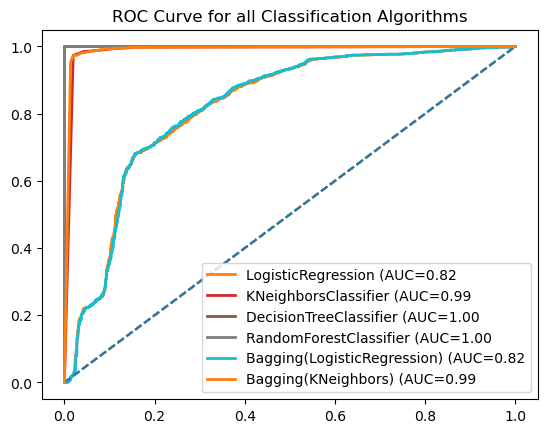

In [37]:
# Section 6.2
# Finding the Confusion Matrix for all Classification Models
# The following models are being used:
# 1. LogisticRegression
# 2. KNeighborsClassifier
# 3. DecisionTreeClassifier
# 4. RandomForestClassifier
# 5. BaggingClassifier with LogisticRegression
# 6. BaggingClassifier with KNeighborsClassifier
# 7. BaggingClassifier with SVC
# 8. SVC

# Assuming a SL= 0.05 (Error Tolerence), CL = 1-SL, CL=1.0.05=0.95
CL = 0.95
prob_df=[]
output_df=[]
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Creating a list of dictonaries for model
models = [{'model':LogisticRegression(),'algo':'LogisticRegression'}, 
          {'model':KNeighborsClassifier(), 'algo':'KNeighborsClassifier'},
          {'model':DecisionTreeClassifier(), 'algo':'DecisionTreeClassifier'}, 
          {'model':RandomForestClassifier(), 'algo':'RandomForestClassifier'}, 
          {'model':BaggingClassifier(LogisticRegression()), 'algo':'Bagging(LogisticRegression)'},
          {'model':BaggingClassifier(KNeighborsClassifier()), 'algo':'Bagging(KNeighbors)'},
          #{'model':BaggingClassifier(SVC()), 'algo':'BaggingClassifier(SVC)'},
          #{'model':SVC(), 'algo':'SVC'}
         ]
for mod in models:
    model = mod['model']
    #print( "Running Model",mod['model'])
    #print( "with Algorithm",mod['algo'])
    for rs in range(1,3):
        X_train,X_test,y_train,y_test = train_test_split(X_train_resampled,
                                                 y_train_resampled,
                                                 test_size=0.2,
                                                 random_state=rs)
        model.fit(X_train,y_train)
        testScore = model.score(X_test,y_test)
        trainScore = model.score(X_train,y_train)
        if testScore > trainScore and testScore >= CL:
            print("Test Score is {} and Train Score is {} in RS value {} for Model {}".
                  format(testScore,trainScore,rs, mod['model']))
            break
    print("Metrics for model:", mod["algo"])
    print(confusion_matrix(y_train_resampled,model.predict(X_train_resampled)))
    auc = roc_auc_curve(model, X_test, y_test, mod["algo"])
    output_df.append({'algo_name':mod['algo'],'Test Score':testScore,'Train Score':trainScore, 
                      'AUC':auc})
plt.title('ROC Curve for all Classification Algorithms')
plt.legend()    


In [38]:
# Test metrics for all classification model
# Test Score, Train Score and Accuracy
# Best Model based on Test Score and Accuracy 
df = pd.DataFrame(output_df)
print(df)


max_val_row_test = df[df['Test Score']  == df['Test Score'].max()]
best_test_score = max_val_row_test['Test Score'].values[0]
max_val_row_AUC = df[df['AUC']  == df['AUC'].max()]
best_AUC = max_val_row_AUC['AUC'].values[0]
best_model_name = max_val_row_test['algo_name'].tolist()

print(f"Best Model Test Score Wise: \n{best_model_name} with a Test Score of: {best_test_score}")
print(f"Best Model AUC Wise: \n{best_model_name} with a AUC of: {best_AUC}")

best_algo = best_model_name[0]

                     algo_name  Test Score  Train Score       AUC
0           LogisticRegression    0.754170     0.767690  0.820701
1         KNeighborsClassifier    0.957342     0.974773  0.987595
2       DecisionTreeClassifier    1.000000     1.000000  1.000000
3       RandomForestClassifier    1.000000     1.000000  1.000000
4  Bagging(LogisticRegression)    0.758272     0.769878  0.821266
5          Bagging(KNeighbors)    0.957069     0.975935  0.990327
Best Model Test Score Wise: 
['DecisionTreeClassifier', 'RandomForestClassifier'] with a Test Score of: 1.0
Best Model AUC Wise: 
['DecisionTreeClassifier', 'RandomForestClassifier'] with a AUC of: 1.0


In [39]:
# Function to return the Best Model based on the Best Algorith name 
def get_bestmodel(best_algo):
    for mod in models:
        if mod['algo'] == best_algo:
            return mod['model']


# Section 6 inferences


# From the Confusion Matrix for RandomForestClassifier
# Section 6.3

From the Section 6.2, the best model is DecisionTreeClassifier and RandomForestClassifier
with a Test Score of 1 and Accuracy of 1.

Metrics for model: RandomForestClassifier
[[9142    0]
 [   0 9142]]
For the positive class i.e for class 1
Precision of 1 i.e P1 = 9142/9142+0= 1.0
Recall of 1 i.e R1 = 9142/0+9142= 1.0
Since both the values are same the model is balancing the number of correct positive predictions and 
caputuring all positive instances. So we can consider either Precision or Recall.
Also, for positive case, capturing as many employee leaving without many flase positive cases, that is
employees who might stay being wrongly predicted as leaving, maynot be a good outcome. In that case we should go with the Recall.

In [40]:
# Section 7
# Retention strategies for target employees

In [41]:
# Section 7.2
# Function to categorizing employees into 4 zones, Based on probability of leaving

def categorize_employees(model, X_test):
    probabilityValues = pd.DataFrame(model.predict_proba(X_test)[:, 1])
    # Define thresholds to categorize probabilities
    threshold= [0.2, 0.6, 0.9]
    category_labels = ['Safe Zone', 'Low Risk Zone', 'Medium Risk Zone', 'High Risk Zone']
    # Categorize probability values into four groups
    categories = np.digitize(probabilityValues, bins=threshold)
    df = pd.concat([probabilityValues, pd.DataFrame(categories)], axis=1)
    df.columns = ['prob', 'category']
    
    for i in range(0,4):
        df['category'].replace(i, category_labels[i], inplace=True)
    print(df.groupby('category').size())
    sns.countplot(data=df, x='category',width=0.8)

Best model:  DecisionTreeClassifier()
Test Score is 1.0 and Training Score is 1.0 
category
High Risk Zone    1816
Safe Zone         1841
dtype: int64


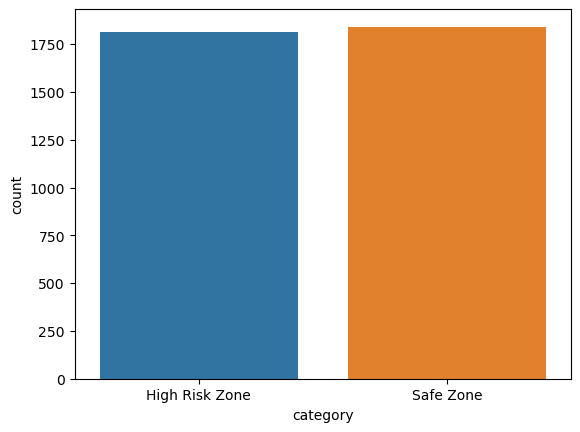

In [42]:
# Section 7.1
# Using best Model received from Section 6, predicting the probability of employee turnover
# From Section 4.3 using the Upscaled training data using SMOTE
# This uses the left class as Label column
# All other columns are the feature columns
X_train,X_test,y_train,y_test = train_test_split(X_train_resampled,
                                                 y_train_resampled,
                                                 test_size=0.2,
                                                 random_state=rs)
model = get_bestmodel(best_algo)
print("Best model: ", model)
model.fit(X_train,y_train)
testScore = model.score(X_test,y_test)
trainScore = model.score(X_train,y_train)

print("Test Score is {} and Training Score is {} ".format(testScore ,trainScore))
categorize_employees(model, X_test)

# Conclusion for Section 7
Based on above metrics, employees in Low Risk Zone and Medium Risk Zone are zero, so we can ingnore this group of employees
We have a high number in the Safe Zone, but since they are in the safe zone, we can igonre this group as well
The High Risk Zone has a higher number of employees and the following startegies can be applied to retain:
 1. Assign key roles to employees in high risk zone with low satisfaction level, in more challenging projects.
 2. Provide incentive based milestones, for high risk employees
 3. Provide structured training in new technoligies for employees in high risk zone who have lower average 
    monthly hours and fewer projects executed.